# Mid Task Intro to Data Science
- Name: Muhammad Haerul
- NIM: H071201033

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import custom matplotlib parameters for vizualizations
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["font.family"] = "monospace";

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 1. Regression Task

**Overview**
- Goal   : House Prices Prediction
- Dataset : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Dataset features explanation:
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [10]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 847kB/s]
100%|##########| 199k/199k [00:00<00:00, 847kB/s]


In [21]:
# read and load data
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('house-prices-advanced-regression-techniques')
    
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [5]:
pd.set_option('display.max_columns', 100)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### 1.1 Data Preprocessing

#### Split Features

In [22]:
X = df.loc[:, df.columns != 'SalePrice']
y = df['SalePrice']

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Note**:
- The data contains three types of data (int64, float64, object)
- There are missing values for some features

#### Missing Data

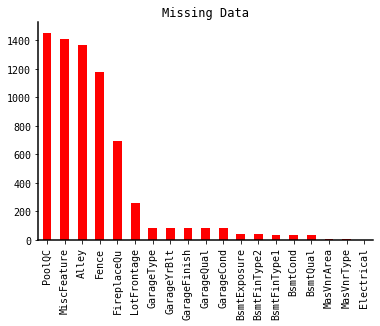

In [24]:
# check missing data
missing = X.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color='red')
plt.title('Missing Data');

In [25]:
# drop features that contains missing data > 50 %
X = X.drop(['Id','Alley','PoolQC','Fence','MiscFeature', 'FireplaceQu'], axis=1)

In [26]:
# separate features into numeric and categoric
num_cols = [col for col in X.columns if X[col].dtype in ['float64','int64']]
cat_cols = [col for col in X.columns if X[col].dtype not in ['float64','int64']]

In [27]:
# replace missing values for data numeric and data categoric
from sklearn.impute import SimpleImputer

X[num_cols] = SimpleImputer().fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])

In [28]:
X_filter_missing = X[X.isna().any(axis=1)]
X_filter_missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


**Note**:
- There is no missing data anymore

In [29]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Min1,2.0,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,9.0,1941.0,2006.0,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,Gd,9.0,Typ,2.0,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,

#### Data Rescaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

X[num_cols] = MinMaxScaler().fit_transform(X[num_cols])

In [31]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.949275,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.122500,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.000000,0.064212,0.140098,GasA,Ex,Y,SBrkr,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,Gd,0.500000,Typ,0.000000,Attchd,0.936364,RFn,0.50,0.386460,TA,TA,Y,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.875,0.753623,0.433333,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.000000,0.121575,0.206547,GasA,Ex,Y,SBrkr,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,TA,0.333333,Typ,0.333333,Attchd,0.690909,RFn,0.50,0.324401,TA,TA,Y,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.934783,0.866667,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.101250,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.086109,Unf,0.000000,0.185788,0.150573,GasA,Ex,Y,SBrkr,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,Gd,0.333333,Typ,0.333333,Attchd,0.918182,RFn,0.50,0.428773,TA,TA,Y,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.666667,0.500,0.311594,0.333333,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.038271,Unf,0.000000,0.231164,0.123732,GasA,Gd,Y,SBrkr,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,Gd,0.416667,Typ,0.333333,Detchd,0.890909,Unf,0.75,0.452750,TA,TA,Y,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.777778,0.500,0.927536,0.833333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.218750,Gd,TA,PConc,Gd,TA,Av,GLQ,0.116052,Unf,0.000000,0.209760,0.187398,GasA,Ex,Y,SBrkr,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,Gd,0.583333,Typ,0.333333,Attchd,0.909091,RFn,0.75,0.589563,TA,TA,Y,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.555556,0.500,0.920290,0.833333,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.000000,0.407962,0.155974,GasA,Ex,Y,SBrkr,0.142038,0.336077,0.0,0.247362,0.000000,0.0,0.666667,0.5,0.375,0.333333,TA,0.416667,Typ,0.333333,Attchd,0.900000,RFn,0.50,0.324401,TA,TA,Y,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,WD,Normal
1456,0.000000,RL,0.219178,0.055505,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,0.555556,0.625,0.768116,0.633

#### Data Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
X[encoded_cols] = encoder.transform(X[cat_cols])

In [66]:
# drop categorical cols after encoding
X = X.drop(cat_cols, axis=1)

In [33]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.949275,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.122500,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.000000,0.064212,0.140098,GasA,Ex,Y,SBrkr,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.875,0.753623,0.433333,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.000000,0.121575,0.206547,GasA,Ex,Y,SBrkr,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.934783,0.866667,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.101250,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.086109,Unf,0.000000,0.185788,0.150573,GasA,Ex,Y,SBrkr,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.666667,0.500,0.311594,0.333333,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.038271,Unf,0.000000,0.231164,0.123732,GasA,Gd,Y,SBrkr,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.777778,0.500,0.927536,0.833333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.218750,Gd,TA,PConc,Gd,TA,Av,GLQ,0.116052,Unf,0.000000,0.209760,0.187398,GasA,Ex,Y,SBrkr,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### 1.2 Exploratory Data Analysis

#### Statistics

In [36]:
# descriptive statistics summary
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Sales')

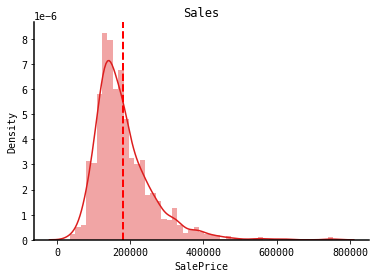

In [34]:
# check the target feature for distribution
sns.distplot(y,color='#dc1e1e')
plt.axvline(y.mean(), color='red', linestyle='--', linewidth=2)
plt.title('Sales')

In [39]:
# skewness and kurtosis
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Relationship with Numerical Variables

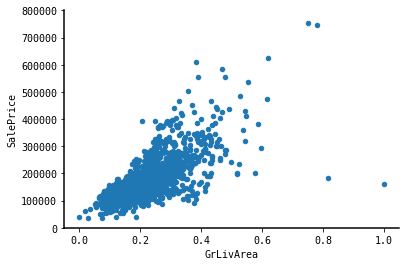

In [40]:
# scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

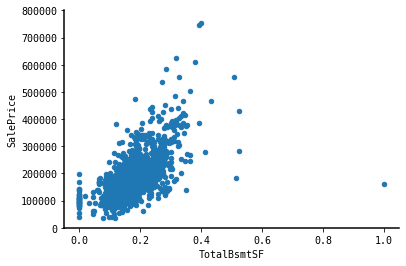

In [41]:
var = 'TotalBsmtSF'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Relationship with Categorical Variables

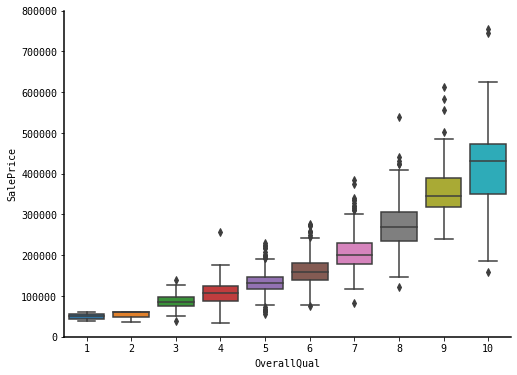

In [46]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([y, df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

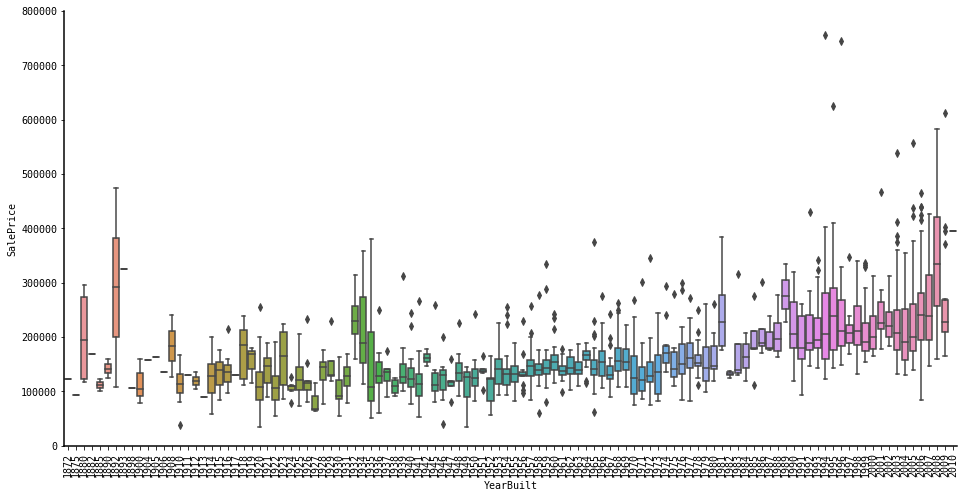

In [56]:
# box plot overallqual/saleprice
var = 'YearBuilt'
data = pd.concat([y, df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90) 
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### All correlation

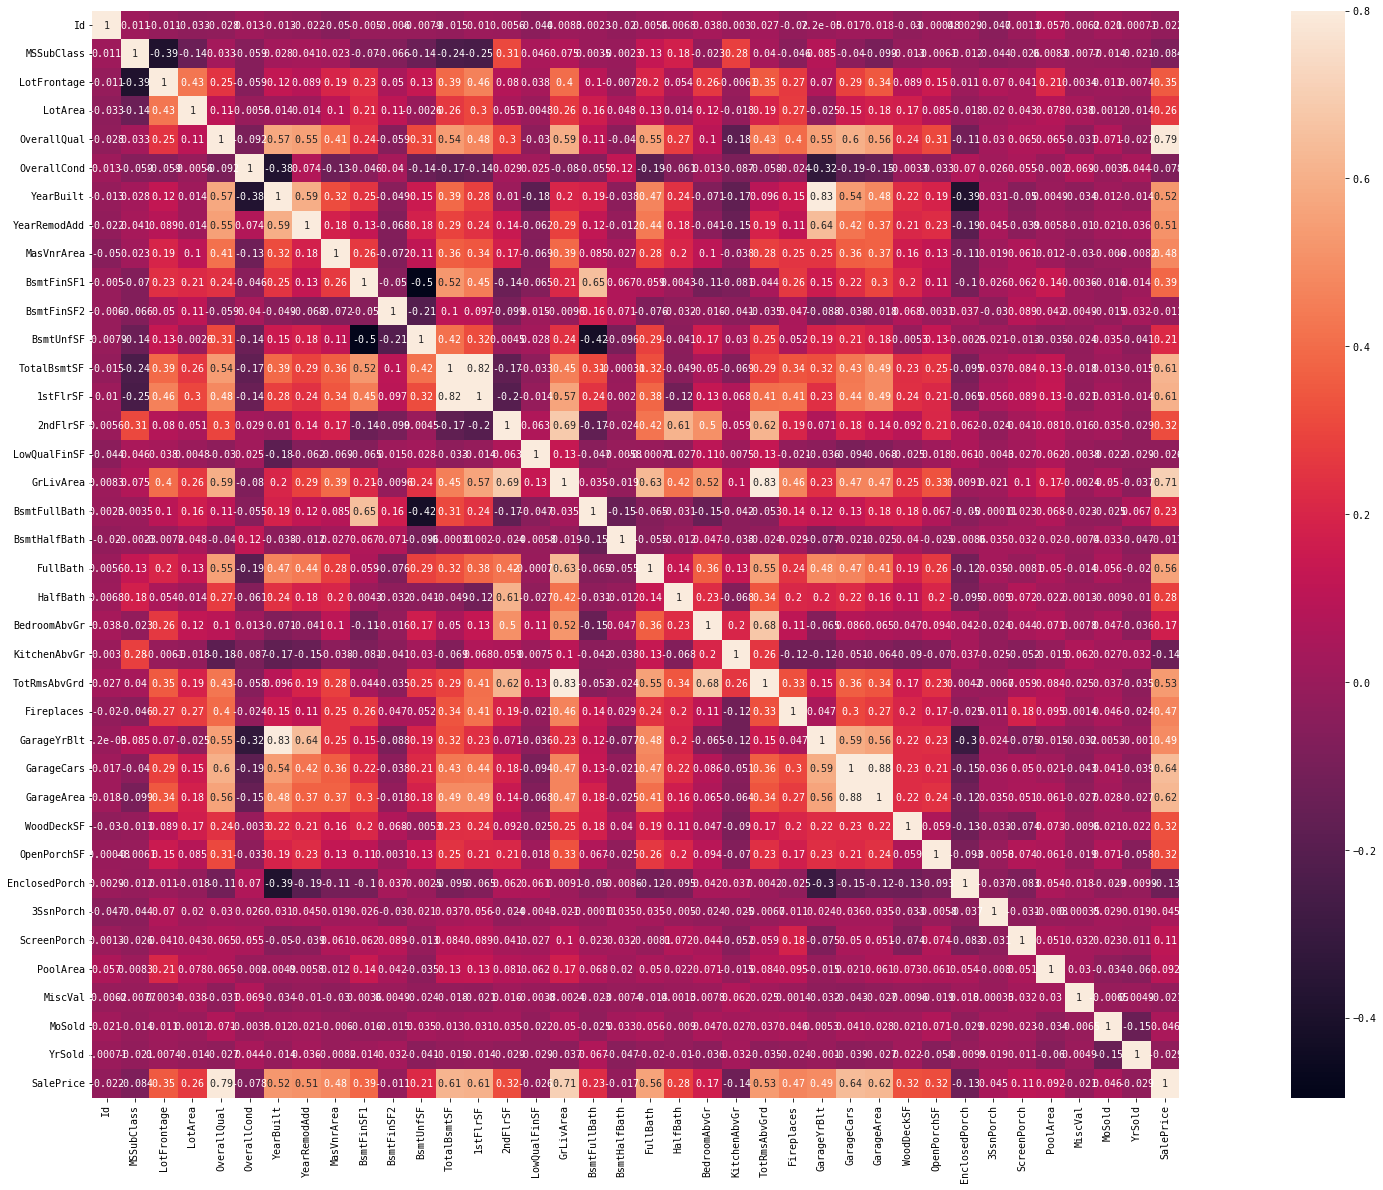

In [62]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

### 1.3 Features Engineering

#### Features Selection

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply SelectKBest for data extraction
bestfeatures = SelectKBest(f_regression, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# joining two dataframes
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                Specs        Score
3         OverallQual  2436.770591
15          GrLivArea  1470.585010
25         GarageCars  1013.705666
26         GarageArea   926.951287
11        TotalBsmtSF   880.341282
12           1stFlrSF   845.524488
168      ExterQual_TA   774.677019
18           FullBath   668.430296
180       BsmtQual_Ex   642.637454
22       TotRmsAbvGrd   580.762801
5           YearBuilt   548.665821
225    KitchenQual_TA   538.358524
241  GarageFinish_Unf   523.246497
6        YearRemodAdd   504.714855
222    KitchenQual_Ex   496.712958
183       BsmtQual_TA   482.240464
176  Foundation_PConc   480.156815
7          MasVnrArea   425.366422
24        GarageYrBlt   413.790894
23         Fireplaces   406.503866


In [83]:
# get the x_new with bestfeatures
X_new = bestfeatures.fit_transform(X, y)

### 1.4 Modelling

In [93]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
# finding best hyperparameters for model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# create a pipeline to perform feature selection, polynomial expansion, scaling, and linear regression
pipeline = Pipeline([
    ('selector', SelectKBest(f_regression)),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# call get_params() on the pipeline instance, providing the self argument
params = pipeline.get_params()

# define the parameter grid for the grid search
param_grid = {
    'selector__k': [5, 10, 15],
    'poly__degree': [1, 2, 3],
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# perform a grid search over the hyperparameters of the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Pipeline Parameters:", grid_search.best_params_)

Best Pipeline Parameters: {'poly__degree': 1, 'regressor__fit_intercept': True, 'regressor__normalize': True, 'selector__k': 15}


In [96]:
# define model with the best hyperparameters
pipeline = Pipeline([
    ('selector', SelectKBest(f_regression, k=15)),
    ('poly', PolynomialFeatures(degree=1)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=True, normalize=True))
])

# train the pipeline on the training data
pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipeline.predict(X_test)

### 1.5 Evaluation

In [98]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # calculate RMSE using np.sqrt() function
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2354219484.908874
R-squared: 0.6590977943077045
Mean Absolute Error: 24221.006345002683


In [102]:
from sklearn.model_selection import cross_val_score

# estimate the pipeline's generalization performance using cross-validation
scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = np.mean(-scores)

print("Cross-Validation Mean Squared Error:", mse_cv)

Cross-Validation Mean Squared Error: 1376196499.8460069


**Conclusion:** Based on the provided results, we can conclude that the selected pipeline with the given hyperparameters performs moderately well in predicting the target variable. The mean squared error (MSE) of the model is 2354219484.9, which indicates that, on average, the model's predictions are off by around 48531.4 (sqrt of MSE). The R-squared score of the model is 0.66, which means that approximately 66% of the variance in the target variable can be explained by the model's features. The mean absolute error (MAE) of the model is 24221.0, which means that, on average, the model's predictions are off by around $24,221.00.

Since the cross-validation MSE is lower than the real MSE, this may indicate that the model is overfitting the training data. Further tuning of the hyperparameters or using a different model may be necessary to improve the model's performance.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 2. Classification Task

**Overview**
- Goal: Customer Classification
- Dataset: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

**Context:** An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market. In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

**Features:**
- ID:	Unique ID
- Gender:	Gender of the customer
- Ever_Married:	Marital status of the customer
- Age:	Age of the customer
- Graduated:	Is the customer a graduate?
- Profession:	Profession of the customer
- Work_Experience:	Work Experience in years
- Spending_Score:	Spending score of the customer
- Family_Size:	Number of family members for the customer (including the customer)
- Var_1:	Anonymised Category for the customer
- Segmentation:	(target) Customer Segment of the customer

In [4]:
!kaggle datasets download -d kaushiksuresh147/customer-segmentation


  0%|          | 0.00/99.9k [00:00<?, ?B/s]
100%|##########| 99.9k/99.9k [00:00<00:00, 580kB/s]
100%|##########| 99.9k/99.9k [00:00<00:00, 577kB/s]


In [5]:
# read and load dataset
import zipfile

with zipfile.ZipFile('customer-segmentation.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

df2 = pd.read_csv('Train.csv')
df2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### 2.1 Data Preprocessing

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


#### Missing Data

In [18]:
df2.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [8]:
# replace missing values with 'Unknown'
df2['Ever_Married'] = df2['Ever_Married'].fillna('Unknown')
df2['Graduated'] = df2['Graduated'].fillna('Unknown')
df2['Profession'] = df2['Profession'].fillna('Unknown')

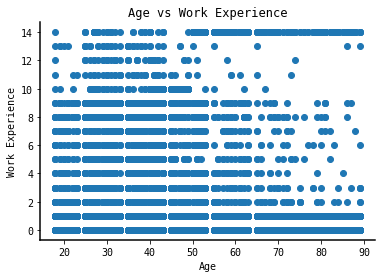

In [12]:
# plotting age vs work_experience
plt.scatter(df2['Age'], df2['Work_Experience'])
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()

In [10]:
# replace missing values for work_experience
# if age < 18 and work_experience == NaN, then work_experience = 0 
df2.loc[(df2['Age'] < 18) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 0 

# if 18 <= age < 20 and work_experience == NaN, then work_experience = 1
df2.loc[(df2['Age'] >= 18) & (df2['Age'] < 20) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 1

# if 20 <= age < 25 and work_experience == NaN, then work_experience = 2
df2.loc[(df2['Age'] >= 20) & (df2['Age'] < 25) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 2

# if 25 <= age < 30 and work_experience == NaN, then work_experience = 3
df2.loc[(df2['Age'] >= 25) & (df2['Age'] < 30) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 3

# if 30 <= age < 40 and work_experience == NaN, then work_experience = 5
df2.loc[(df2['Age'] >= 30) & (df2['Age'] < 40) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 5

# if 40 <= age < 50 and work_experience == NaN, then work_experience = 10
df2.loc[(df2['Age'] >= 40) & (df2['Age'] < 50) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 10

# if 50 <= age and work_experience == NaN, then work_experience = 14
df2.loc[(df2['Age'] >= 50) & (df2['Work_Experience'].isna()), 'Work_Experience'] = 14

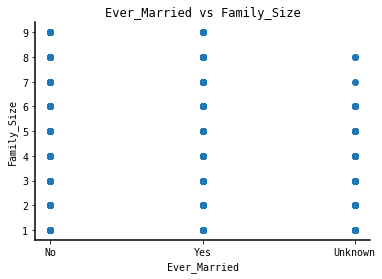

In [13]:
# plotting ever_married vs family_size
plt.scatter(df2['Ever_Married'], df2['Family_Size'])
plt.title('Ever_Married vs Family_Size')
plt.xlabel('Ever_Married')
plt.ylabel('Family_Size')
plt.show()

In [14]:
df2['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [15]:
print(df2['Family_Size'].mean())
print(df2['Family_Size'].median())

2.85012285012285
3.0


In [16]:
# replace missing values for family_size with median
median = df2['Family_Size'].median()
df2['Family_Size'].fillna(median, inplace=True)

In [17]:
# drop missing values for Var_1
df2.dropna(subset=['Var_1'], inplace=True)

In [19]:
df2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,5.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,10.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Unknown,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### Data Outliers

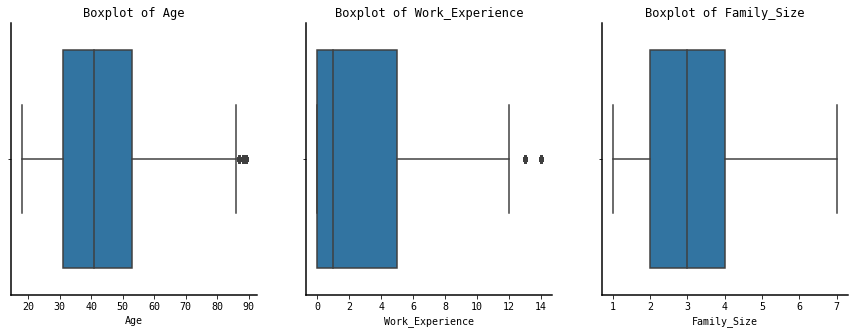

In [22]:
# check outliers

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot Age column
sns.boxplot(x=df2['Age'], ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_title('Boxplot of Age')

# plot Work_Experience column
sns.boxplot(x=df2['Work_Experience'], ax=axes[1])
axes[1].set_xlabel('Work_Experience')
axes[1].set_title('Boxplot of Work_Experience')

# plot Family_Size column
sns.boxplot(x=df2['Family_Size'], ax=axes[2])
axes[2].set_xlabel('Family_Size')
axes[2].set_title('Boxplot of Family_Size')

plt.show()

In [21]:
# remove outliers

from scipy import stats

# Calculate the z-scores for the Age, Work_Experience, and Family_Size columns
z_scores = stats.zscore(df2[['Age', 'Work_Experience', 'Family_Size']])

# Find the absolute values of the z-scores
abs_z_scores = np.abs(z_scores)
abs_z_scores

# Remove the rows with outliers (i.e., rows with at least one z-score greater than 3)
df2 = df2[(abs_z_scores < 3).all(axis=1)]

### Data Encoding

In [23]:
df2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,5.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,10.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Unknown,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [46]:
# specify encoding method
features_for_label_encoder = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']
features_for_one_hot_encoder = ['Profession', 'Var_1']

In [47]:
from sklearn.preprocessing import LabelEncoder

# encode categorical variables with label encoder
le = LabelEncoder()
df2[features_for_label_encoder] = df2[features_for_label_encoder].apply(le.fit_transform)

In [29]:
from sklearn.preprocessing import OneHotEncoder

# encode categorical variables with label encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df2[features_for_one_hot_encoder])
encoded_cols = list(encoder.get_feature_names(features_for_one_hot_encoder))
df2[encoded_cols] = encoder.transform(df2[features_for_one_hot_encoder])

In [49]:
# drop features for one hot encoder after encoding
df2 = df2.drop(columns=features_for_one_hot_encoder)

#### Data Rescaling

In [43]:
from sklearn.preprocessing import StandardScaler

# define the features to rescale
features_to_rescale = ['Age', 'Work_Experience', 'Family_Size']

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the training data and transform both training and test data
df2[features_to_rescale] = scaler.fit_transform(df2[features_to_rescale])

In [44]:
df2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Lawyer,Profession_Marketing,Profession_Unknown,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,0,-1.291550,No,Healthcare,-0.560374,2,0.877872,Cat_4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643,0,2,-0.333815,Yes,Engineer,0.455949,0,0.152466,Cat_4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315,0,2,1.402082,Yes,Engineer,-0.560374,2,-1.298347,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735,1,2,1.402082,Yes,Lawyer,-0.814454,1,-0.572940,Cat_6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669,0,2,-0.214098,Yes,Entertainment,1.726353,1,2.328684,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,-1.291550,No,Unknown,-0.814454,2,3.054090,Cat_1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,464685,1,0,-0.513390,No,Executive,-0.052212,2,0.877872,Cat_4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,465406,0,0,-0.633107,Yes,Healthcare,-0.560374,2,-1.298347,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,467299,0,0,-0.992258,Yes,Healthcare,-0.560374,2,0.877872,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Split Features

In [51]:
pd.set_option('display.max_columns', 26)
df2

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,0,-1.291550,0,-0.560374,2,0.877872,D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643,0,2,-0.333815,2,0.455949,0,0.152466,A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315,0,2,1.402082,2,-0.560374,2,-1.298347,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735,1,2,1.402082,2,-0.814454,1,-0.572940,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669,0,2,-0.214098,2,1.726353,1,2.328684,A,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,-1.291550,0,-0.814454,2,3.054090,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,464685,1,0,-0.513390,0,-0.052212,2,0.877872,D,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,465406,0,0,-0.633107,2,-0.560374,2,-1.298347,D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,467299,0,0,-0.992258,2,-0.560374,2,0.877872,B,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
X = df2.drop(columns=['ID', 'Segmentation'])
y = df2['Segmentation']

In [54]:
X

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,-1.291550,0,-0.560374,2,0.877872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,2,-0.333815,2,0.455949,0,0.152466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,2,1.402082,2,-0.560374,2,-1.298347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1.402082,2,-0.814454,1,-0.572940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,-0.214098,2,1.726353,1,2.328684,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,-1.291550,0,-0.814454,2,3.054090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,1,0,-0.513390,0,-0.052212,2,0.877872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,0,0,-0.633107,2,-0.560374,2,-1.298347,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,0,0,-0.992258,2,-0.560374,2,0.877872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 7898, dtype: object

### 2.2 Exploratory Data Analysis

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

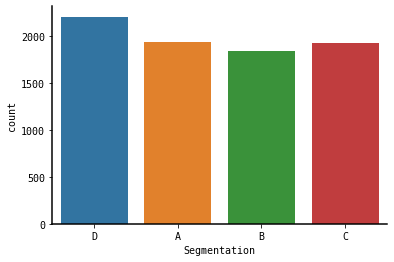

In [31]:
# check the distribution of the target variable Segmentation
sns.countplot(x='Segmentation', data=df2)

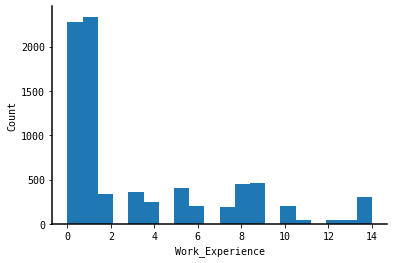

In [34]:
# explore the distribution of numerical features using histograms
feature = 'Work_Experience'
plt.hist(df2[feature], bins=20)
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Profession', ylabel='Age'>

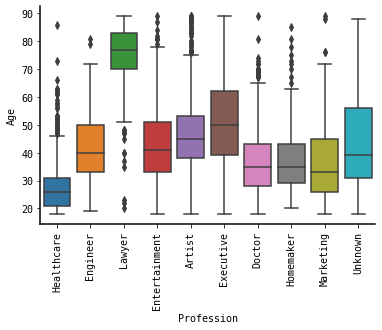

In [37]:
# explore the relationship between categorical and numerical features using bar plots or box plots
x = 'Profession'
y = 'Age'
plt.xticks(rotation=90)
sns.boxplot(x=x, y=y, data=df2)

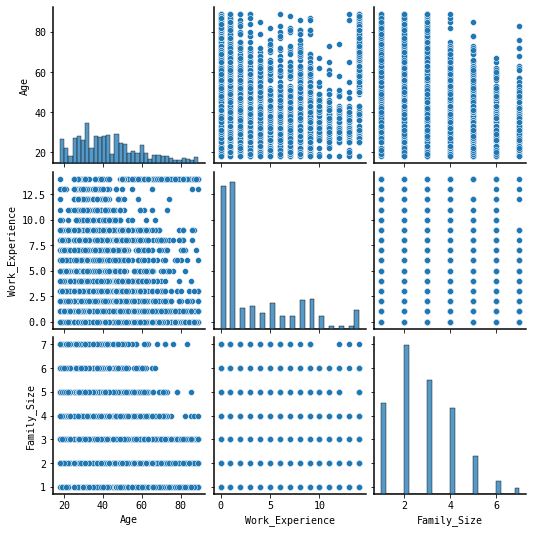

In [38]:
# use correlation matrices or pair plots to identify potential correlations between numerical features
sns.pairplot(df2[['Age', 'Work_Experience', 'Family_Size']])

<AxesSubplot:>

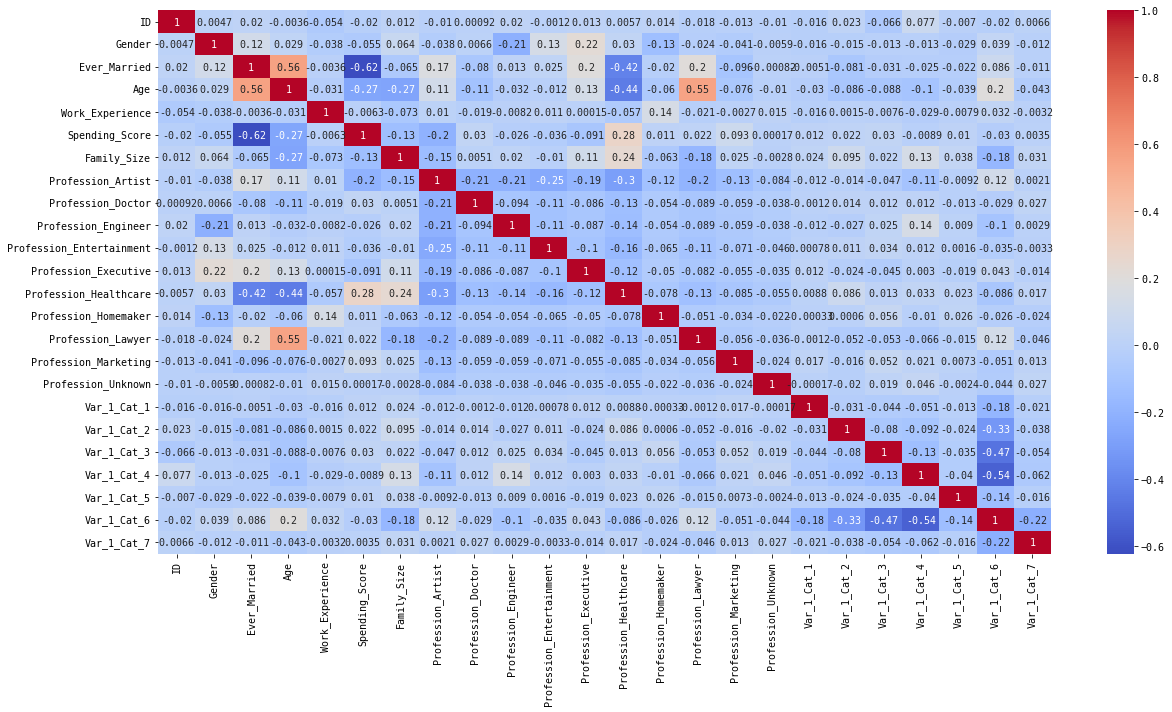

In [40]:
# heatmap correlation
corr_matrix = df2.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### 2.3 Modelling

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### KNN

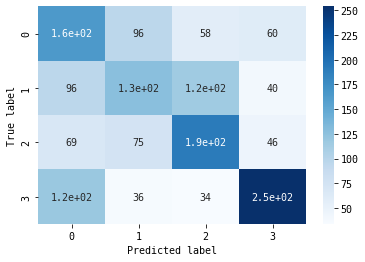


Classification Report:
               precision    recall  f1-score   support

           A       0.37      0.43      0.40       378
           B       0.38      0.34      0.36       378
           C       0.48      0.50      0.49       381
           D       0.64      0.57      0.60       443

    accuracy                           0.47      1580
   macro avg       0.47      0.46      0.46      1580
weighted avg       0.47      0.47      0.47      1580

Accuracy: 46.58%

Cross Val: 47.04% (+/- 1.39%)


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Modelling

# Initialize KNN classifier
knn_model = KNeighborsClassifier(algorithm='auto')

# Fit the model on training data
knn_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn_model.predict(X_test)

# Generate confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# confussion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# classification report
print("\nClassification Report:\n", class_report)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# cross-validation
scores = cross_val_score(knn_model, X, y, cv=10)
print("\nCross Val: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

**Explanation:** The confusion matrix and classification report indicate that the KNN model is not performing well in distinguishing between the different classes, with relatively low precision, recall, and f1-score for each class. The accuracy of the model is also relatively low at 46.58%.

The cross-validation score is slightly higher at 47.04% (+/- 1.39%), but still not very high. This suggests that the model is not very robust and may not generalize well to new data.

Overall, it seems that the KNN algorithm may not be the best fit for this dataset and could be improved by trying different algorithms or adjusting the parameters of the current algorithm to achieve better performance.

#### Decision Tree

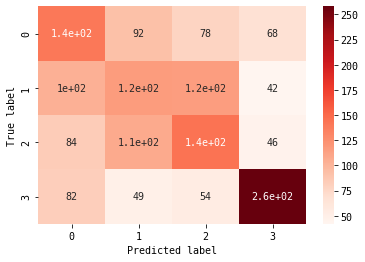

Classification Report:
               precision    recall  f1-score      support
A              0.342298  0.370370  0.355781   378.000000
B              0.320548  0.309524  0.314939   378.000000
C              0.367347  0.377953  0.372574   381.000000
D              0.623188  0.582393  0.602100   443.000000
accuracy       0.417089  0.417089  0.417089     0.417089
macro avg      0.413345  0.410060  0.411349  1580.000000
weighted avg   0.421891  0.417089  0.419123  1580.000000

Accuracy: 41.71%

Cross Val Accuracy: 43.59% (+/- 0.96%)


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = dt_model.predict(X_test)

# Generate confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Reds')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Display classification report as a dataframe
df_report = pd.DataFrame(class_report).transpose()
print("Classification Report:\n", df_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy*100))

# Cross-validation
scores = cross_val_score(dt_model, X, y, cv=5)
print("\nCross Val Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

**Explanation:** The confusion matrix and classification report of the model using Decision Tree show that the model has low precision, recall, and f1-score for each class, as well as a low overall accuracy of 41.39%. This suggests that the model is not performing well in distinguishing between the different classes.

The cross-validation score is slightly higher at 43.48% (+/- 0.58%), but still not very high. This suggests that the model may not generalize well to new data.

Overall, it seems that the model using Decision Tree is not performing well on this dataset and could be improved by trying different algorithms or adjusting the parameters of the current algorithm.

#### Naïve Bayes

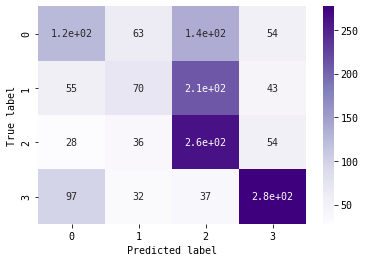

[[125  63 136  54]
 [ 55  70 210  43]
 [ 28  36 263  54]
 [ 97  32  37 277]]
Classification Report:
               precision    recall  f1-score     support
A              0.409836  0.330688  0.366032   378.00000
B              0.348259  0.185185  0.241796   378.00000
C              0.407121  0.690289  0.512171   381.00000
D              0.647196  0.625282  0.636051   443.00000
accuracy       0.465190  0.465190  0.465190     0.46519
macro avg      0.453103  0.457861  0.439013  1580.00000
weighted avg   0.461000  0.465190  0.447257  1580.00000

Accuracy: 46.52%

Cross Val Accuracy: 46.83% (+/- 1.54%)


In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Generate confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(conf_mat)

# Display classification report as a dataframe
df_report = pd.DataFrame(class_report).transpose()
print("Classification Report:\n", df_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy*100))

# Cross-validation
scores = cross_val_score(nb_model, X, y, cv=5)
print("\nCross Val Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

**Explanation** The confusion matrix and classification report of the model using Naive Bayes show that the model has varying levels of precision, recall, and f1-score for each class, with the highest scores achieved for class D. The overall accuracy of the model is 46.52%, which is slightly better than the accuracy of the Decision Tree model.

The cross-validation score is also slightly higher at 46.83% (+/- 1.54%), indicating that the model may be more likely to generalize well to new data than the Decision Tree model.

However, the performance of the Naive Bayes model is still relatively low and could potentially be improved by trying different algorithms or optimizing the current model's parameters.

**Conclusion:** Based on the evaluation of the three models using KNN, Decision Tree, and Naive Bayes, it can be concluded that none of the models are performing very well on the given classification task. The accuracy of all three models is below 50%, indicating that they are not effective in distinguishing between the different classes.

The cross-validation scores are also relatively low, with none of the models achieving scores above 50%, which suggests that they may not generalize well to new data.

It is recommended to try different algorithms or adjusting the parameters of the current algorithms to improve their performance. Additionally, it may be necessary to collect more data or improve the quality of the existing data to improve the accuracy and generalizability of the models.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 3. Clustering Task

**Overview:**
- Goal: Customer Clustering
- Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**Content**
- People
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

- Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month

- Target
    - Need to perform clustering to summarize customer segments.

In [10]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Source code downloaded to D:\0. ON-GOING\Intro-to-Data-Science\customer-segmentation-clustering.ipynb


In [170]:
# read and load dataset
import pandas as pd
import zipfile

with zipfile.ZipFile('customer-personality-analysis.zip', 'r') as zip_ref:
    with zip_ref.open('marketing_campaign.csv') as csv_file:
        df3 = pd.read_csv(csv_file, sep='\t')

# Set display options
pd.set_option('display.max_columns', 30)

df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### 3.1 Data Preprocessing

In [171]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Info:**
- There are 2240 rows and 29 columns 
- Types data: int64, float64, object

#### Missing Data

In [172]:
df3.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [173]:
# drop na values
print('Before:', df3.shape)
df3 = df3.dropna()
print('After:', df3.shape)

Before: (2240, 29)
After: (2216, 29)


#### Features Engineering

In [174]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [175]:
# check values for categorical data
print("Total categories in the feature Education:\n", df3["Education"].value_counts(), "\n")
print("Total categories in the feature Marital_Status:\n", df3["Marital_Status"].value_counts(), "\n")

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [176]:
# convert string date to datetime
df3["Dt_Customer"] = pd.to_datetime(df3["Dt_Customer"])

dates = []
for i in df3["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print("The oldest customer's enrolment date in the records:",min(dates))
print("The newest customer's enrolment date in therecords:", max(dates))

The oldest customer's enrolment date in the records: 2012-01-08
The newest customer's enrolment date in therecords: 2014-12-06


In [177]:
# created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer

for i in dates:
    delta = d1 - i
    days.append(delta)

df3["Customer_Days"] = days
df3["Customer_Days"] = pd.to_numeric(df3["Customer_Days"], errors="coerce")
df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27734400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,46742400000000000
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,5270400000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,27216000000000000
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,27302400000000000


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [178]:
max_year_when_data_was_recorded = df3['Dt_Customer'].dt.year.max()
max_year_when_data_was_recorded

2014

In [179]:
import datetime

# age of customer when data was recorded
df3["Age"] = max_year_when_data_was_recorded - df3["Year_Birth"]

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [180]:
# total spendings on various items
df3["Total_Spent"] = (
    df3["MntWines"] +
    df3["MntFruits"] +
    df3["MntMeatProducts"] +
    df3["MntFishProducts"] +
    df3["MntSweetProducts"] +
    df3["MntGoldProds"]
)

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [181]:
# deriving living situation by marital status"Alone"
df3["Living_Situation"] = df3["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [182]:
# feature indicating total children living in the household
df3["Children"] = df3["Kidhome"] + df3["Teenhome"]

Create three categories in the "Education" by simplifying its value counts.

In [183]:
# segmenting education levels in three groups
edu_map = {
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
}

df3["Education"] = df3["Education"].map(edu_map)

In [184]:
print(df3['Z_CostContact'].value_counts())
print(df3['Z_Revenue'].value_counts())

3    2216
Name: Z_CostContact, dtype: int64
11    2216
Name: Z_Revenue, dtype: int64


In [185]:
# dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 'Kidhome', 'Teenhome']
df3 = df3.drop(to_drop, axis=1)

In [186]:
df3

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,57,1617,Alone,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,60,27,Alone,2
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,49,776,Partner,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,30,53,Partner,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,33,422,Partner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,47,1341,Partner,1
2236,Postgraduate,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,68,444,Partner,3
2237,Graduate,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,33,1241,Alone,0
2238,Postgraduate,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,58,843,Partner,1


In [187]:
df3.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Days', 'Age',
       'Total_Spent', 'Living_Situation', 'Children'],
      dtype='object')

In [188]:
# simplify the columns name
column_names = {
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
    
    'NumDealsPurchases': 'Deals_Purchases',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumWebVisitsMonth': 'Web_Visits_Month',
    
    'AcceptedCmp1': 'Accepted_Cmp1',
    'AcceptedCmp2': 'Accepted_Cmp2',
    'AcceptedCmp3': 'Accepted_Cmp3',
    'AcceptedCmp4': 'Accepted_Cmp4',
    'AcceptedCmp5': 'Accepted_Cmp5',
}

df3 = df3.rename(columns=column_names)

In [189]:
df3

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,57,1617,Alone,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,60,27,Alone,2
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,49,776,Partner,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,30,53,Partner,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,33,422,Partner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,47,1341,Partner,1
2236,Postgraduate,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,68,444,Partner,3
2237,Graduate,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,33,1241,Alone,0
2238,Postgraduate,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,58,843,Partner,1


#### Data Outliers

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 864x432 with 0 Axes>

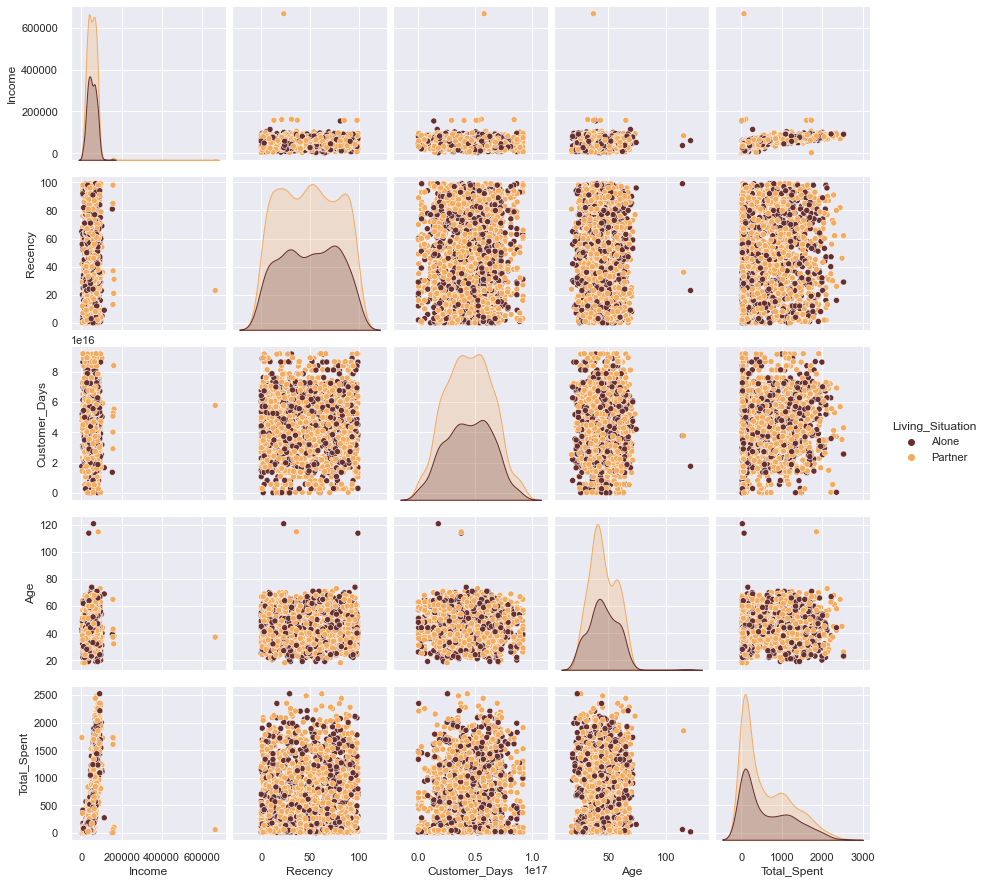

In [190]:
# plotting following features
To_Plot = [ "Income", "Recency", "Customer_Days", "Age", "Total_Spent", "Living_Situation"]
print("Reletive Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(df3[To_Plot], hue= "Living_Situation", palette= (["#682F2F","#F3AB60"]))

plt.show()

In [191]:
def identify_outliers(dataframe, column_name):
    q1, q3 = dataframe[column_name].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    print('Lower_bound =', lower_bound)
    print('Upper_bound =', upper_bound)
    return outliers

In [192]:
print(identify_outliers(df3[['Age']], 'Age'), '\n')
print(identify_outliers(df3[['Income']], 'Income'), '\n')
print(identify_outliers(df3[['Total_Spent']], 'Total_Spent'), '\n')

Lower_bound = 10.0
Upper_bound = 82.0
     Age
192  114
239  121
339  115 

Lower_bound = -14525.5
Upper_bound = 118350.5
        Income
164   157243.0
617   162397.0
655   153924.0
687   160803.0
1300  157733.0
1653  157146.0
2132  156924.0
2233  666666.0 

Lower_bound = -1399.5
Upper_bound = 2516.5
      Total_Spent
1179         2525
1492         2524
1572         2525 



In [193]:
# dropping the outliers by setting a cap on Age and income. 
print("The total number of data-points before removing the outliers are:", len(df3))
df3 = df3[(df3["Age"] < 82)]
df3 = df3[(df3["Income"] < 118350.5)]
df3 = df3[(df3["Total_Spent"] < 2516.5)]
print("The total number of data-points after removing the outliers are:", len(df3))

The total number of data-points before removing the outliers are: 2216
The total number of data-points after removing the outliers are: 2202


#### Data Encoding

In [194]:
df3

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,57,1617,Alone,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,60,27,Alone,2
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,49,776,Partner,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,30,53,Partner,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,33,422,Partner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,47,1341,Partner,1
2236,Postgraduate,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,68,444,Partner,3
2237,Graduate,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,33,1241,Alone,0
2238,Postgraduate,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,58,843,Partner,1


In [218]:
df3_before_encoded = df3
df3_before_encoded

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,57,1617,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,60,27,0,2
2,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,49,776,1,0
3,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,30,53,1,1
4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,33,422,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,47,1341,1,1
2236,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,68,444,1,3
2237,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,33,1241,0,0
2238,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,58,843,1,1


In [196]:
# get list of categorical variables
s = (df3.dtypes == 'object')
cat_cols = list(s[s].index)
print("Categorical variables in the dataset:", cat_cols)

Categorical variables in the dataset: ['Education', 'Living_Situation']


In [197]:
print(df3['Education'].value_counts(), '\n')
print(df3['Living_Situation'].value_counts())

Graduate         1112
Postgraduate      838
Undergraduate     252
Name: Education, dtype: int64 

Partner    1421
Alone       781
Name: Living_Situation, dtype: int64


In [198]:
from sklearn.preprocessing import LabelEncoder

# initialize a LabelEncoder object
le = LabelEncoder()
df3[cat_cols] = df3[cat_cols].apply(le.fit_transform)
df3_encoded = df3
df3_encoded

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,57,1617,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,60,27,0,2
2,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,49,776,1,0
3,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,30,53,1,1
4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,33,422,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,47,1341,1,1
2236,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,68,444,1,3
2237,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,33,1241,0,0
2238,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,58,843,1,1


In [199]:
df3.dtypes

Education              int32
Income               float64
Recency                int64
Wines                  int64
Fruits                 int64
Meat                   int64
Fish                   int64
Sweets                 int64
Gold                   int64
Deals_Purchases        int64
Web_Purchases          int64
Catalog_Purchases      int64
NumStorePurchases      int64
Web_Visits_Month       int64
Accepted_Cmp3          int64
Accepted_Cmp4          int64
Accepted_Cmp5          int64
Accepted_Cmp1          int64
Accepted_Cmp2          int64
Complain               int64
Response               int64
Customer_Days          int64
Age                    int64
Total_Spent            int64
Living_Situation       int32
Children               int64
dtype: object

#### Data Rescaling

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3_rescaled = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

df3_rescaled

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children
0,-0.891910,0.317669,0.310276,0.982089,1.560050,1.764807,2.450732,1.491629,0.850191,0.360401,1.424385,2.634148,-0.561148,0.687909,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,2.377513,1.972687,1.016304,1.694294,-1.348874,-1.268839
1,-0.891910,-0.252786,-0.380865,-0.874727,-0.637988,-0.732143,-0.650963,-0.634637,-0.734795,-0.169728,-1.132442,-0.587100,-1.178508,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.665351,1.273043,-0.965610,-1.348874,1.402274
2,-0.891910,0.969430,-0.795550,0.360174,0.574723,-0.172641,1.337771,-0.145840,-0.038948,-0.699856,1.424385,-0.229184,1.290934,-0.556430,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.173154,0.331669,0.287389,0.741359,-1.268839
3,-0.891910,-1.205543,-0.795550,-0.874727,-0.562193,-0.667407,-0.505001,-0.585757,-0.754125,-0.169728,-0.767181,-0.945016,-0.561148,0.273129,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.923368,-1.294340,-0.922115,0.741359,0.066717
4,0.571567,0.325166,1.554331,-0.392669,0.423134,-0.214257,0.151828,0.000799,-0.560834,1.420658,0.328602,0.128733,0.056213,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.822496,-1.037602,-0.304816,0.741359,0.066717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,-0.891910,0.466884,-0.104409,1.202288,0.423134,0.081678,0.078847,2.224824,3.923517,-0.169728,1.789646,0.128733,-0.561148,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,0.123566,0.160510,1.232575,0.741359,0.066717
2198,0.571567,0.601880,0.241162,0.300661,-0.663253,-0.621167,-0.687454,-0.659076,-0.696137,2.480915,1.424385,-0.229184,-0.252467,0.687909,-0.281801,-0.283674,-0.278028,3.823221,-0.117525,-0.095739,-0.420608,-1.940569,1.957678,-0.268013,0.741359,2.737830
2199,-0.891910,0.261707,1.450659,1.794445,0.549458,0.243517,-0.103605,-0.365798,-0.386872,-0.699856,-0.767181,0.128733,2.216975,0.273129,-0.281801,3.525171,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.848298,-1.037602,1.065285,-1.348874,-1.268839
2200,0.571567,0.854894,-1.417577,0.366126,0.094691,0.229645,0.772168,0.074119,0.328305,-0.169728,0.693863,0.844566,1.290934,-0.971210,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.843998,1.101884,0.399473,0.741359,0.066717


### 3.2 Dimensionality Reduction

#### Correlation

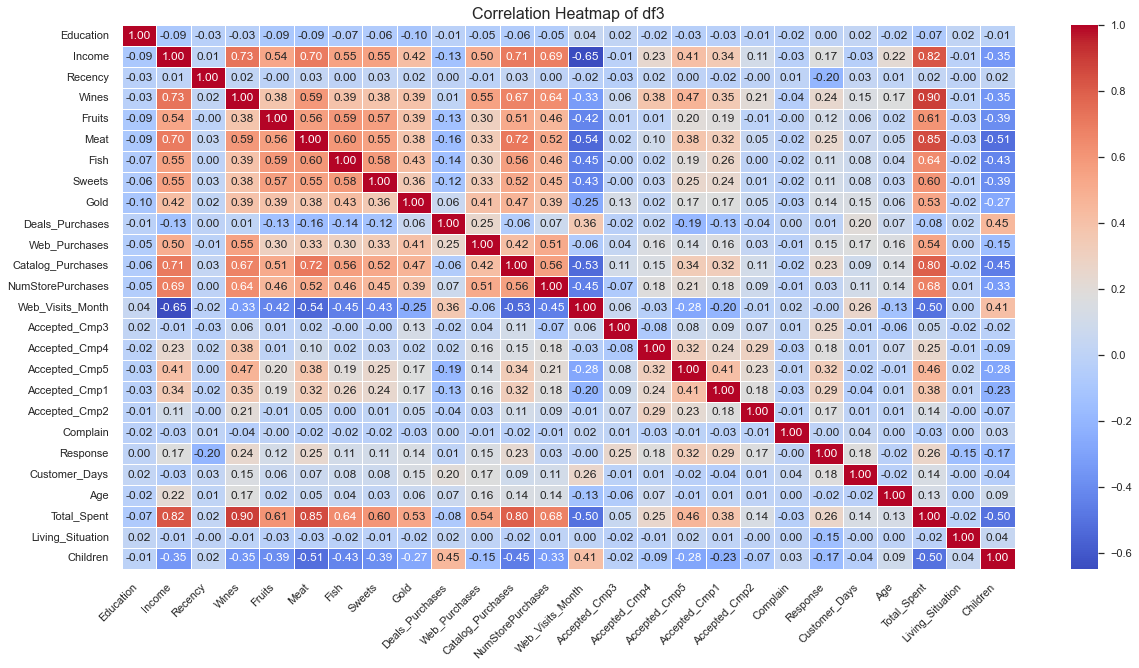

In [201]:
# create a heatmap of the correlation matrix
corr = df3_rescaled.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of df3', fontsize=16)
plt.show()

#### Principal Component Analysis

In [202]:
from sklearn.decomposition import PCA

# initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df3_rescaled)
PCA_ds = pd.DataFrame(pca.transform(df3_rescaled), columns=(["col1","col2", "col3"]))
PCA_ds

,col1,col2,col3
0,4.351817,1.006345,-1.238794
1,-2.595023,-0.818088,0.415470
2,1.731636,-0.782039,-0.902570
3,-2.648274,-1.253510,0.785833
4,-0.366310,-0.266196,-0.956638
...,...,...,...
2197,2.556294,0.436941,-1.919802
2198,-0.871768,2.533894,-0.444968
2199,1.831752,0.236640,1.014005
2200,1.657152,-0.509543,-0.946890


In [203]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2202.0,-1.097114e-16,2.770541,-5.413935,-2.488269,-0.859998,2.236611,8.052703
col2,2202.0,-5.162890e-17,1.410514,-3.513712,-0.947029,-0.221640,0.755344,6.332988
col3,2202.0,6.130932e-17,1.364367,-4.711492,-0.835735,-0.002472,0.630337,7.999030


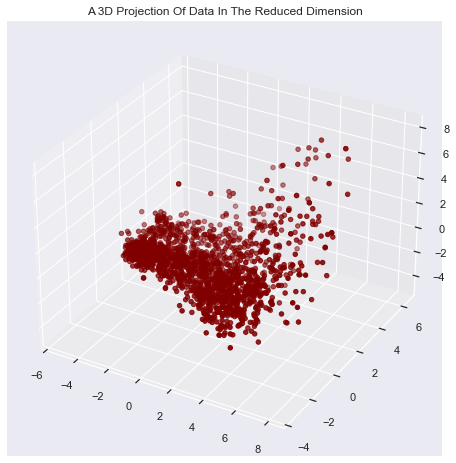

In [204]:
# 3D projection of data
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# to plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

### 3.3 Clustering

Elbow Method to determine the number of clusters to be formed:


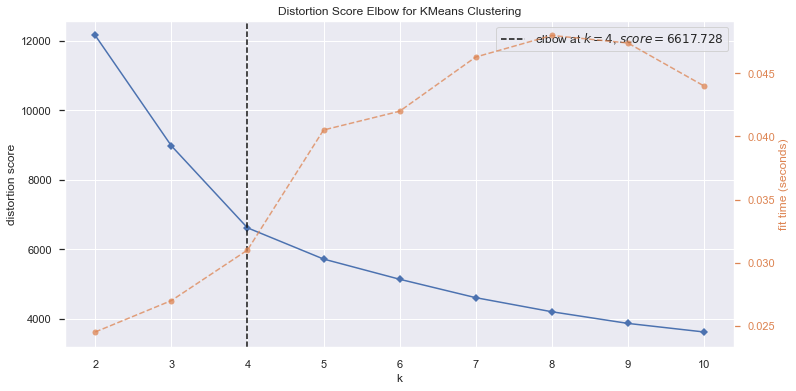

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**Explanation:** The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [206]:
from sklearn.cluster import KMeans

# instantiate a KMeans clustering algorithm with the optimal number of clusters
kmeans_model = KMeans(n_clusters=4, random_state=42)

# fit the KMeans model to the PCA-reduced data and extract the labels
clusters_pred = kmeans_model.fit_predict(PCA_ds)
PCA_ds['Clusters'] = clusters_pred

# add the labels to the original data
df3_rescaled["Clusters"] = clusters_pred

In [207]:
PCA_ds

,col1,col2,col3,Clusters
0,4.351817,1.006345,-1.238794,2
1,-2.595023,-0.818088,0.415470,1
2,1.731636,-0.782039,-0.902570,2
3,-2.648274,-1.253510,0.785833,1
4,-0.366310,-0.266196,-0.956638,3
...,...,...,...,...
2197,2.556294,0.436941,-1.919802,2
2198,-0.871768,2.533894,-0.444968,3
2199,1.831752,0.236640,1.014005,2
2200,1.657152,-0.509543,-0.946890,2


In [208]:
df3_rescaled

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children,Clusters
0,-0.891910,0.317669,0.310276,0.982089,1.560050,1.764807,2.450732,1.491629,0.850191,0.360401,1.424385,2.634148,-0.561148,0.687909,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,2.377513,1.972687,1.016304,1.694294,-1.348874,-1.268839,2
1,-0.891910,-0.252786,-0.380865,-0.874727,-0.637988,-0.732143,-0.650963,-0.634637,-0.734795,-0.169728,-1.132442,-0.587100,-1.178508,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.665351,1.273043,-0.965610,-1.348874,1.402274,1
2,-0.891910,0.969430,-0.795550,0.360174,0.574723,-0.172641,1.337771,-0.145840,-0.038948,-0.699856,1.424385,-0.229184,1.290934,-0.556430,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.173154,0.331669,0.287389,0.741359,-1.268839,2
3,-0.891910,-1.205543,-0.795550,-0.874727,-0.562193,-0.667407,-0.505001,-0.585757,-0.754125,-0.169728,-0.767181,-0.945016,-0.561148,0.273129,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.923368,-1.294340,-0.922115,0.741359,0.066717,1
4,0.571567,0.325166,1.554331,-0.392669,0.423134,-0.214257,0.151828,0.000799,-0.560834,1.420658,0.328602,0.128733,0.056213,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.822496,-1.037602,-0.304816,0.741359,0.066717,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,-0.891910,0.466884,-0.104409,1.202288,0.423134,0.081678,0.078847,2.224824,3.923517,-0.169728,1.789646,0.128733,-0.561148,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,0.123566,0.160510,1.232575,0.741359,0.066717,2
2198,0.571567,0.601880,0.241162,0.300661,-0.663253,-0.621167,-0.687454,-0.659076,-0.696137,2.480915,1.424385,-0.229184,-0.252467,0.687909,-0.281801,-0.283674,-0.278028,3.823221,-0.117525,-0.095739,-0.420608,-1.940569,1.957678,-0.268013,0.741359,2.737830,3
2199,-0.891910,0.261707,1.450659,1.794445,0.549458,0.243517,-0.103605,-0.365798,-0.386872,-0.699856,-0.767181,0.128733,2.216975,0.273129,-0.281801,3.525171,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.848298,-1.037602,1.065285,-1.348874,-1.268839,2
2200,0.571567,0.854894,-1.417577,0.366126,0.094691,0.229645,0.772168,0.074119,0.328305,-0.169728,0.693863,0.844566,1.290934,-0.971210,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.843998,1.101884,0.399473,0.741359,0.066717,2


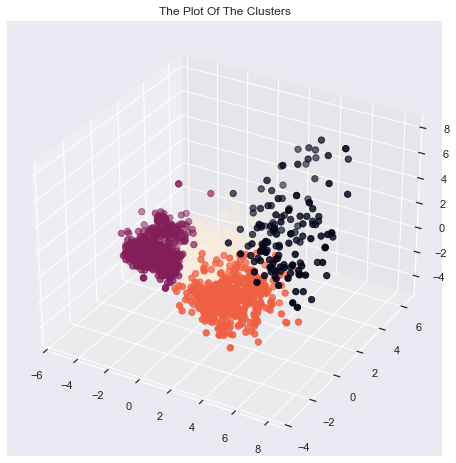

In [209]:
# plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### 3.4 Evaluating Model

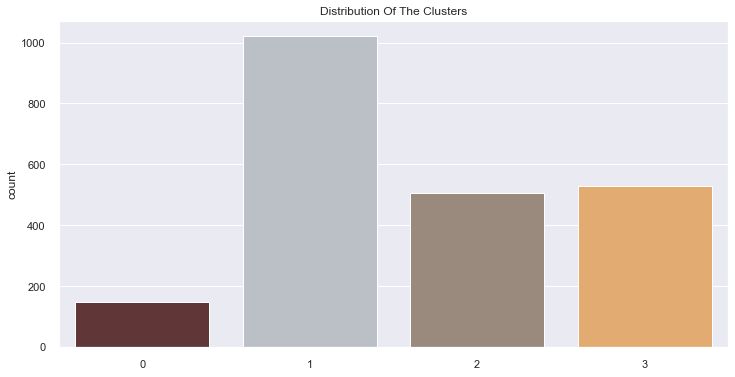

In [210]:
# plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=clusters_pred, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [211]:
df3_rescaled['Clusters'].value_counts()

1    1021
3     528
2     507
0     146
Name: Clusters, dtype: int64

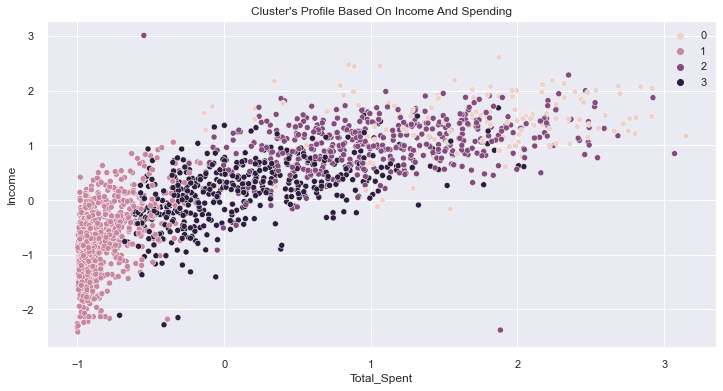

In [212]:
pl = sns.scatterplot(data=df3_rescaled, 
                     x=df3_rescaled["Total_Spent"], 
                     y=df3_rescaled["Income"], 
                     hue=df3_rescaled["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

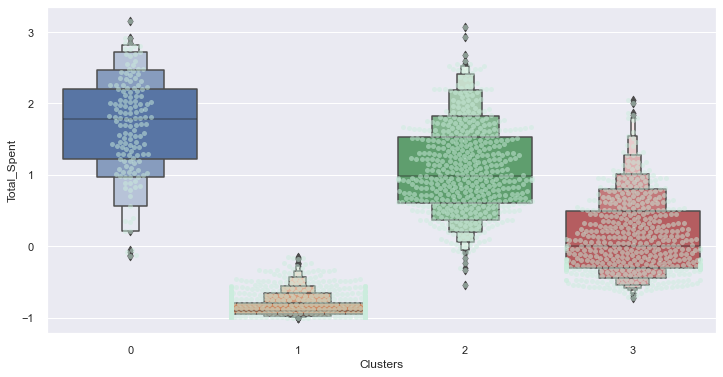

In [213]:
plt.figure()
pl=sns.swarmplot(x=df3_rescaled["Clusters"], y=df3_rescaled["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df3_rescaled["Clusters"], y=df3_rescaled["Total_Spent"])
plt.show()

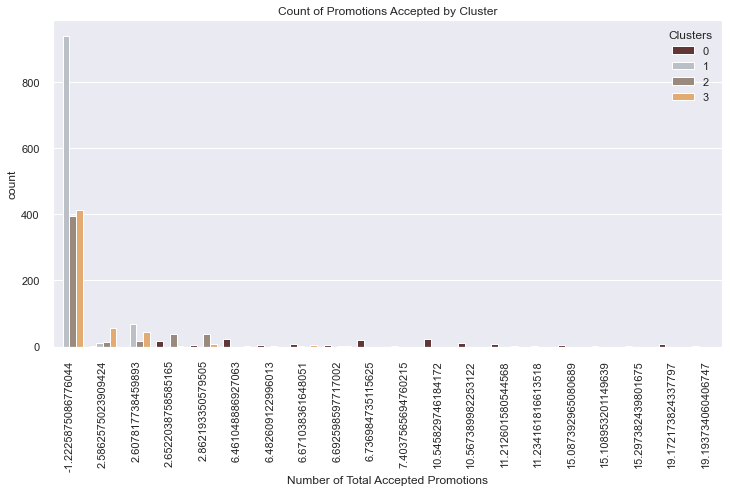

In [214]:
# create a feature to get a sum of accepted promotions
df3_rescaled["Total_Promos"] = df3_rescaled["Accepted_Cmp1"] + df3_rescaled["Accepted_Cmp2"] + df3_rescaled["Accepted_Cmp3"] + df3_rescaled["Accepted_Cmp4"] + df3_rescaled["Accepted_Cmp5"]

# plot count of total campaign accepted by cluster
sns.set(rc={"figure.figsize":(12, 6)})
sns.countplot(data=df3_rescaled, x="Total_Promos", hue="Clusters", palette=pal)
plt.title("Count of Promotions Accepted by Cluster")
plt.xlabel("Number of Total Accepted Promotions")
plt.xticks(rotation=90)

plt.show()

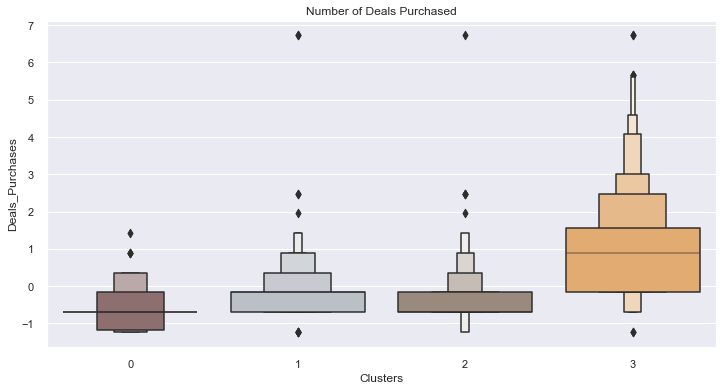

In [215]:
# plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df3_rescaled["Deals_Purchases"],x=df3_rescaled["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

In [216]:
df3_rescaled

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,NumStorePurchases,Web_Visits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Response,Customer_Days,Age,Total_Spent,Living_Situation,Children,Clusters,Total_Promos
0,-0.891910,0.317669,0.310276,0.982089,1.560050,1.764807,2.450732,1.491629,0.850191,0.360401,1.424385,2.634148,-0.561148,0.687909,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,2.377513,1.972687,1.016304,1.694294,-1.348874,-1.268839,2,-1.222588
1,-0.891910,-0.252786,-0.380865,-0.874727,-0.637988,-0.732143,-0.650963,-0.634637,-0.734795,-0.169728,-1.132442,-0.587100,-1.178508,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.665351,1.273043,-0.965610,-1.348874,1.402274,1,-1.222588
2,-0.891910,0.969430,-0.795550,0.360174,0.574723,-0.172641,1.337771,-0.145840,-0.038948,-0.699856,1.424385,-0.229184,1.290934,-0.556430,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.173154,0.331669,0.287389,0.741359,-1.268839,2,-1.222588
3,-0.891910,-1.205543,-0.795550,-0.874727,-0.562193,-0.667407,-0.505001,-0.585757,-0.754125,-0.169728,-0.767181,-0.945016,-0.561148,0.273129,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-1.923368,-1.294340,-0.922115,0.741359,0.066717,1,-1.222588
4,0.571567,0.325166,1.554331,-0.392669,0.423134,-0.214257,0.151828,0.000799,-0.560834,1.420658,0.328602,0.128733,0.056213,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.822496,-1.037602,-0.304816,0.741359,0.066717,3,-1.222588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,-0.891910,0.466884,-0.104409,1.202288,0.423134,0.081678,0.078847,2.224824,3.923517,-0.169728,1.789646,0.128733,-0.561148,-0.141650,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,0.123566,0.160510,1.232575,0.741359,0.066717,2,-1.222588
2198,0.571567,0.601880,0.241162,0.300661,-0.663253,-0.621167,-0.687454,-0.659076,-0.696137,2.480915,1.424385,-0.229184,-0.252467,0.687909,-0.281801,-0.283674,-0.278028,3.823221,-0.117525,-0.095739,-0.420608,-1.940569,1.957678,-0.268013,0.741359,2.737830,3,2.862193
2199,-0.891910,0.261707,1.450659,1.794445,0.549458,0.243517,-0.103605,-0.365798,-0.386872,-0.699856,-0.767181,0.128733,2.216975,0.273129,-0.281801,3.525171,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.848298,-1.037602,1.065285,-1.348874,-1.268839,2,2.586258
2200,0.571567,0.854894,-1.417577,0.366126,0.094691,0.229645,0.772168,0.074119,0.328305,-0.169728,0.693863,0.844566,1.290934,-0.971210,-0.281801,-0.283674,-0.278028,-0.261560,-0.117525,-0.095739,-0.420608,-0.843998,1.101884,0.399473,0.741359,0.066717,2,-1.222588


### 3.4 Profiling

<Figure size 864x432 with 0 Axes>

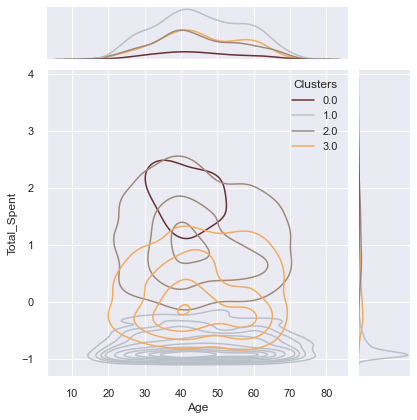

<Figure size 864x432 with 0 Axes>

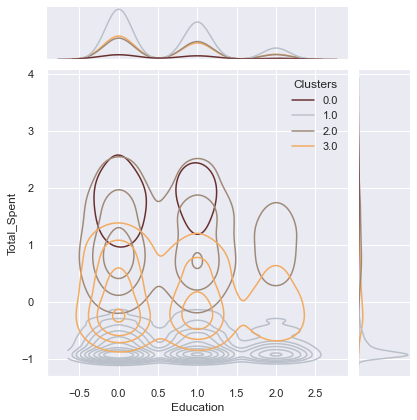

<Figure size 864x432 with 0 Axes>

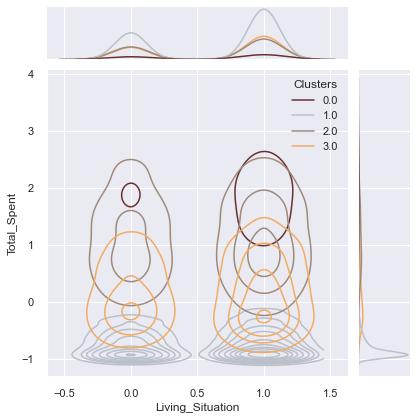

<Figure size 864x432 with 0 Axes>

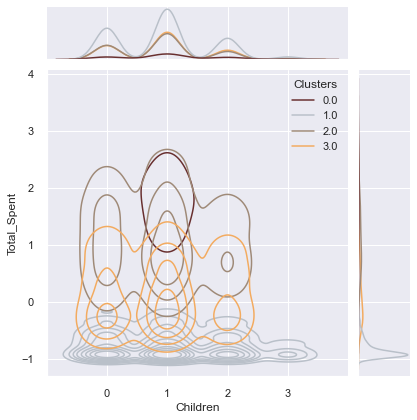

<Figure size 864x432 with 0 Axes>

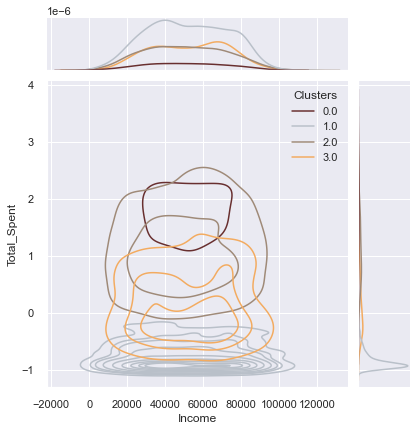

<Figure size 864x432 with 0 Axes>

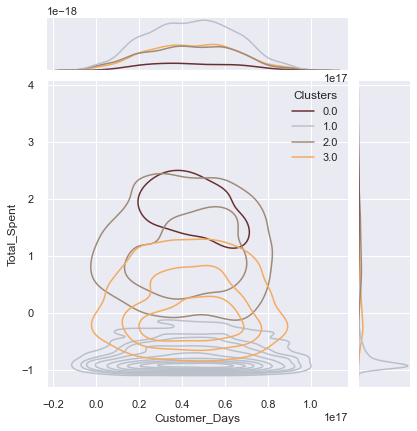

In [220]:
Personal = ['Age', 'Education', 'Living_Situation', 'Children', 'Income', 'Customer_Days']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df3_before_encoded[i], y=df3_rescaled["Total_Spent"], hue =df3_rescaled["Clusters"], kind="kde", palette=pal)
    plt.show()

**Explanation:**
- **Cluster 0:**
    - High spending, High income
    - 30-50 years old
    - Only Graduated/Postgraduated
    - Mostly living together
    - Only have one child

- **Cluster 1:**
    - Low spending, low income
    - 10-80 years old
    - All type of education
    - Have 0-3 children

- **Cluster 2:**
    - Medium-high spending, medium-high income
    - 20-70 years old
    - Mostly graduated/postgraduated
    - Have a maximum of two children
    
- **Cluster 3:**
    - Low-medium spending, low medium income
    - 20-70 years old
    - Mostly graduated/postgraduated
    - have a maximum of two children

**Conclusion:** Based on the given clusters, we can make the following conclusions:

Cluster 0 represents high-income individuals who are 30-50 years old, highly educated, living with a partner, and have only one child. They have high spending habits, which means they are likely to be wealthy and are capable of affording luxury goods.

Cluster 1 represents low-income individuals of all ages, with various levels of education and family situations, and low spending habits. This group is likely to be financially constrained and has limited purchasing power.

Cluster 2 represents medium to high-income individuals, who are mostly highly educated, 20-70 years old, and have a maximum of two children. This group has moderate to high spending habits, which means they are likely to have enough disposable income to afford some luxury goods, but they are also careful about their spending.

Cluster 3 represents low to medium-income individuals, who are mostly highly educated, 20-70 years old, and have a maximum of two children. This group has low to medium spending habits, which means they are likely to have limited disposable income and are more budget-conscious.

These conclusions can be useful for marketers or businesses in tailoring their marketing strategies and offerings to specific customer segments. For example, for customers in Cluster 0, luxury goods and high-end products could be marketed, while for customers in Cluster 1, budget-friendly products could be targeted. Similarly, for customers in Clusters 2 and 3, mid-range products could be marketed, and promotions or discounts could be offered to encourage purchases.